In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.python.ops.numpy_ops import np_config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np_config.enable_numpy_behavior()
%matplotlib inline

In [6]:
digits = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [7]:
digit_features = digits.copy()
digit_features.pop('label')
digit_features = tf.convert_to_tensor(digit_features).reshape((42000,28,28)) / 255


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [8]:
digit_labels = tf.convert_to_tensor(digits['label'])

In [10]:
model = models.Sequential()
model.add(layers.RandomRotation(input_shape=(28, 28,1), factor=(-0.05, 0.05)))
model.add(layers.Conv2D(28, (5, 5), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (5,5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_1 (RandomRot (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 28)        728       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 28)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 56)          39256     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 56)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)              

In [11]:
images = tf.convert_to_tensor(np.array(digit_features))
labels = tf.convert_to_tensor(np.array(digit_labels))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images, labels, epochs=20, validation_split = 0.3)

2022-06-28 00:03:44.056112: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
919/919 [==============================] - 18s 18ms/step - loss: 0.2060 - accuracy: 0.9358 - val_loss: 0.0676 - val_accuracy: 0.9787
Epoch 2/20
919/919 [==============================] - 18s 19ms/step - loss: 0.0715 - accuracy: 0.9783 - val_loss: 0.0533 - val_accuracy: 0.9834
Epoch 3/20
919/919 [==============================] - 17s 19ms/step - loss: 0.0537 - accuracy: 0.9828 - val_loss: 0.0550 - val_accuracy: 0.9841
Epoch 4/20
919/919 [==============================] - 17s 19ms/step - loss: 0.0467 - accuracy: 0.9855 - val_loss: 0.0445 - val_accuracy: 0.9874
Epoch 5/20
919/919 [==============================] - 17s 18ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0466 - val_accuracy: 0.9865
Epoch 6/20
919/919 [==============================] - 18s 19ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0403 - val_accuracy: 0.9887
Epoch 7/20
919/919 [==============================] - 17s 18ms/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0479 - val_accuracy:

1313/1313 - 8s - loss: 0.0203 - accuracy: 0.9956


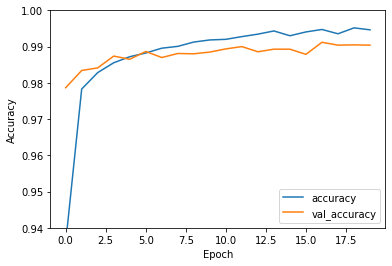

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.94, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images,  labels, verbose=2)

In [16]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [21]:
test_data = tf.convert_to_tensor(test_data).reshape((28000,28,28)) / 255
test_data = np.expand_dims(test_data, axis = -1)

In [22]:
logits = model.predict(test_data)
predicted_labels = [logit.argmax() for logit in logits]

In [23]:
submission = pd.DataFrame({'ImageId' : range(1,28001), 'Label' : predicted_labels})

In [24]:
submission.to_csv('/kaggle/working/submission.csv', index=False)